In [1]:
import numpy as np
import random
import torch
import imp
import dataset, network
import losses
import torch.nn as nn
import generators
import seaborn as sns

In [3]:
# ! wget http://opihi.cs.uvic.ca/sound/genres.tar.gz
# ! tar -xvzf genres.tar.gz

--2020-06-06 20:25:04--  http://opihi.cs.uvic.ca/sound/genres.tar.gz
Resolving web.ucsd.edu (web.ucsd.edu)... 132.239.1.230, 132.239.1.231
Connecting to web.ucsd.edu (web.ucsd.edu)|132.239.1.230|:3128... connected.
Proxy request sent, awaiting response... 200 OK
Length: 1225571541 (1.1G) [application/x-gzip]
Saving to: ‘genres.tar.gz’

genres.tar.gz       100%[===================>]   1.14G  4.19MB/s    in 4m 47s  

2020-06-06 20:29:52 (4.07 MB/s) - ‘genres.tar.gz’ saved [1225571541/1225571541]

genres/
genres/bextract_single.mf
genres/bl.mf
genres/blues/
genres/cl.mf
genres/classical/
genres/co.mf
genres/country/
genres/di.mf
genres/disco/
genres/hi.mf
genres/hiphop/
genres/input.mf
genres/ja.mf
genres/jazz/
genres/me.mf
genres/metal/
genres/po.mf
genres/pop/
genres/re.mf
genres/reggae/
genres/ro.mf
genres/rock/
genres/rock/rock.00000.wav
genres/rock/rock.00001.wav
genres/rock/rock.00002.wav
genres/rock/rock.00003.wav
genres/rock/rock.00004.wav
genres/rock/rock.00005.wav
genres/rock/ro

genres/pop/pop.00064.wav
genres/pop/pop.00065.wav
genres/pop/pop.00066.wav
genres/pop/pop.00067.wav
genres/pop/pop.00068.wav
genres/pop/pop.00069.wav
genres/pop/pop.00070.wav
genres/pop/pop.00071.wav
genres/pop/pop.00072.wav
genres/pop/pop.00073.wav
genres/pop/pop.00074.wav
genres/pop/pop.00075.wav
genres/pop/pop.00076.wav
genres/pop/pop.00077.wav
genres/pop/pop.00078.wav
genres/pop/pop.00079.wav
genres/pop/pop.00080.wav
genres/pop/pop.00081.wav
genres/pop/pop.00082.wav
genres/pop/pop.00083.wav
genres/pop/pop.00084.wav
genres/pop/pop.00085.wav
genres/pop/pop.00086.wav
genres/pop/pop.00087.wav
genres/pop/pop.00088.wav
genres/pop/pop.00089.wav
genres/pop/pop.00090.wav
genres/pop/pop.00091.wav
genres/pop/pop.00092.wav
genres/pop/pop.00093.wav
genres/pop/pop.00094.wav
genres/pop/pop.00095.wav
genres/pop/pop.00096.wav
genres/pop/pop.00097.wav
genres/pop/pop.00098.wav
genres/pop/pop.00099.wav
genres/metal/metal.00000.wav
genres/metal/metal.00001.wav
genres/metal/metal.00002.wav
genres/metal/

genres/hiphop/hiphop.00055.wav
genres/hiphop/hiphop.00056.wav
genres/hiphop/hiphop.00057.wav
genres/hiphop/hiphop.00058.wav
genres/hiphop/hiphop.00059.wav
genres/hiphop/hiphop.00060.wav
genres/hiphop/hiphop.00061.wav
genres/hiphop/hiphop.00062.wav
genres/hiphop/hiphop.00063.wav
genres/hiphop/hiphop.00064.wav
genres/hiphop/hiphop.00065.wav
genres/hiphop/hiphop.00066.wav
genres/hiphop/hiphop.00067.wav
genres/hiphop/hiphop.00068.wav
genres/hiphop/hiphop.00069.wav
genres/hiphop/hiphop.00070.wav
genres/hiphop/hiphop.00071.wav
genres/hiphop/hiphop.00072.wav
genres/hiphop/hiphop.00073.wav
genres/hiphop/hiphop.00074.wav
genres/hiphop/hiphop.00075.wav
genres/hiphop/hiphop.00076.wav
genres/hiphop/hiphop.00077.wav
genres/hiphop/hiphop.00078.wav
genres/hiphop/hiphop.00079.wav
genres/hiphop/hiphop.00080.wav
genres/hiphop/hiphop.00081.wav
genres/hiphop/hiphop.00082.wav
genres/hiphop/hiphop.00083.wav
genres/hiphop/hiphop.00084.wav
genres/hiphop/hiphop.00085.wav
genres/hiphop/hiphop.00086.wav
genres/h

genres/classical/classical.00017.wav
genres/classical/classical.00018.wav
genres/classical/classical.00019.wav
genres/classical/classical.00020.wav
genres/classical/classical.00021.wav
genres/classical/classical.00022.wav
genres/classical/classical.00023.wav
genres/classical/classical.00024.wav
genres/classical/classical.00025.wav
genres/classical/classical.00026.wav
genres/classical/classical.00027.wav
genres/classical/classical.00028.wav
genres/classical/classical.00029.wav
genres/classical/classical.00030.wav
genres/classical/classical.00031.wav
genres/classical/classical.00032.wav
genres/classical/classical.00033.wav
genres/classical/classical.00034.wav
genres/classical/classical.00035.wav
genres/classical/classical.00036.wav
genres/classical/classical.00037.wav
genres/classical/classical.00038.wav
genres/classical/classical.00039.wav
genres/classical/classical.00040.wav
genres/classical/classical.00041.wav
genres/classical/classical.00042.wav
genres/classical/classical.00043.wav
g

In [ ]:
%run 'train.py' --preloaded 0 --data_root './genres' --embedding_type 'center-softmax' --embedding_save_path './embedding'

./genres 0 10
Genres Found: 
['jazz', 'pop', 'disco', 'hiphop', 'reggae', 'blues', 'classical', 'country', 'metal', 'rock'] 

Genre Counts
jazz - 100
pop - 100
disco - 100
hiphop - 100
reggae - 100
blues - 49
classical - 100
country - 100
metal - 100
rock - 100
949 songs loaded...
cuda:0


Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /tmp/xdg-cache/torch/checkpoints/resnet50-19c8e357.pth
100%|██████████| 97.8M/97.8M [00:01<00:00, 75.0MB/s]


Train Loss after epoch 4 = 3.595782977431568
Train Accuracy after epoch 4 = 0.9882903958119663
Val Loss after epoch 4 = 10.619804827372233
Val Accuracy after epoch 4 = 0.7347368266371195




<Figure size 1170x827 with 1 Axes>

./genres 1 10
Loaded train data with shape:  (4270, 1, 128, 387)
Loaded val data with shape:  (475, 1, 128, 387)
cuda:0
Train Loss after epoch 4 = 0.4626414602928197
Train Accuracy after epoch 4 = 0.8470725975478394
Val Loss after epoch 4 = 1.201694118976593
Val Accuracy after epoch 4 = 0.6273684078448757




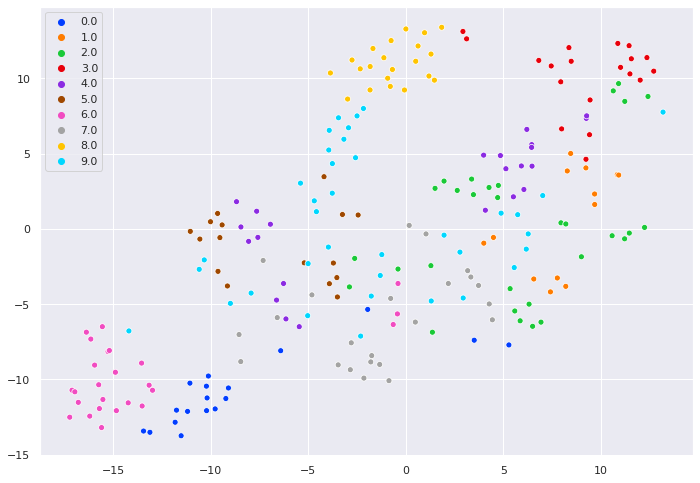

Train Loss after epoch 9 = 0.19432088727159286
Train Accuracy after epoch 9 = 0.9367681476890676
Val Loss after epoch 9 = 1.5611780405044555
Val Accuracy after epoch 9 = 0.6315789340720225




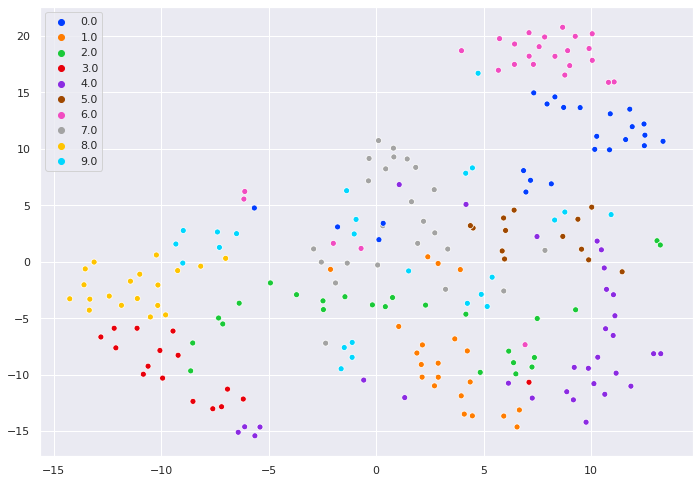

In [3]:
%run 'train.py' --preloaded 1 --data_root './genres' --embedding_type 'softmax' --embedding_save_path './embedding'